# **Data Acqusition**

In [1]:
%pip install yfinance pandas seaborn plotly PyPortfolioOpt

import yfinance as yf
import datetime as dt
import pandas as pd
import numpy as np
import warnings
warnings.simplefilter('ignore')

tickers = ['AMZN', 'JPM', 'META', 'PG', 'GOOGL', 'CAT', 'PFE', 'EXC', 'DE', 'JNJ', 'SPY']
start = dt.datetime(2018, 1, 1)
end = dt.datetime.now()

print("Fetching data for tickers: ", tickers)
df = yf.download(tickers, start=start, end=end)
df.to_csv('stock_data.csv')
print("Data fetched and saved.")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 222.1/222.1 kB 9.6 MB/s eta 0:00:00
Fetching data for tickers:  ['AMZN', 'JPM', 'META', 'PG', 'GOOGL', 'CAT', 'PFE', 'EXC', 'DE', 'JNJ', 'SPY']


[*********************100%***********************]  11 of 11 completed


Data fetched and saved.


# **Exploratory Data Analysis**

In [2]:
close_price_df = pd.read_csv('stock_data.csv')
close_price_df

Price               Close             Close.1             Close.2  \
0         Ticker                AMZN                 CAT                  DE   
1           Date                 NaN                 NaN                 NaN   
2     2018-01-02   59.45050048828125  131.85165405273438  140.73182678222656   
3     2018-01-03  60.209999084472656   132.0531463623047       141.373046875   
4     2018-01-04   60.47949981689453  133.86671447753906  142.18357849121094   
...          ...                 ...                 ...                 ...   
1987  2025-11-24  226.27999877929688   559.5999755859375   487.2300109863281   
1988  2025-11-25   229.6699981689453   566.6099853515625   498.1300048828125   
1989  2025-11-26  229.16000366210938     573.72998046875   469.8699951171875   
1990  2025-11-28  233.22000122070312    575.760009765625    464.489990234375   
1991  2025-12-01  234.72999572753906    571.032470703125  472.45001220703125   

                 Close.3             Close.4             Close.5  \
0                    EXC               GOOGL                 JNJ   
1                    NaN                 NaN                 NaN   
2     21.364788055419922  53.292930603027344  111.35299682617188   
3     21.078777313232422   54.20216369628906  112.41673278808594   
4     20.781970977783203    54.4127082824707  112.40872192382812   
...                  ...                 ...                 ...   
1987   46.22999954223633   318.5799865722656              204.75   
1988  45.779998779296875  323.44000244140625   206.6699981689453   
1989   46.56999969482422  319.95001220703125  207.55999755859375   
1990  47.119998931884766  320.17999267578125   206.9199981689453   
1991  45.880001068115234   316.1300048828125   206.5449981689453   

                Close.6             Close.7             Close.8  ... Volume.1  \
0                   JPM                META                 PFE  ...      CAT   
1                   NaN                 NaN                 NaN  ...      NaN   
2     86.73033905029297  180.30845642089844   24.22960090637207  ...  5108400   
3     86.81873321533203  183.53855895996094  24.409128189086914  ...  4146100   
4     88.06246185302734   183.2006072998047  24.462316513061523  ...  4865800   
...                 ...                 ...                 ...  ...      ...   
1987              298.0   613.0499877929688  25.219999313354492  ...  4653500   
1988              303.0    636.219970703125  25.719999313354492  ...  3105100   
1989  307.6400146484375   633.6099853515625  25.709999084472656  ...  1995100   
1990  313.0799865722656   647.9500122070312  25.739999771118164  ...  1019500   
1991  309.6300048828125    641.489990234375   25.30500030517578  ...   734586   

     Volume.2  Volume.3  Volume.4  Volume.5  Volume.6  Volume.7  Volume.8  \
0          DE       EXC     GOOGL       JNJ       JPM      META       PFE   
1         NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2     1897600   7224506  31766000   6842100  13578800  18151900  17059833   
3     1392300   6750350  31318000   5350500  11901000  16886600  14183151   
4     1747000   6630619  26052000   4837600  12953700  13880900  13046517   
...       ...       ...       ...       ...       ...       ...       ...   
1987  2182900  16557300  85165100  14803900  10940200  23554900  63074900   
1988  2188500   6968800  88632100  10275300   8877200  25213000  39130300   
1989  5473600   5576200  51373400   6729000   7910900  15209500  33461000   
1990  1682600   3792800  26018600   5638300   4322400  11033200  22627600   
1991   973857   4427332  20731832   3458949   3341935   7029477  30966031   

      Volume.9 Volume.10  
0           PG       SPY  
1          NaN       NaN  
2      7558900  86655700  
3      5863600  90070400  
4      6322500  80636400  
...        ...       ...  
1987  13846900  80437900  
1988  10477700  81077100  
1989   9238500  71879600  
1990   4707200  49212000  
1991   3764953  30581560  

[1992 rows

In [3]:
# Extracting 'Close' prices from the multi-indexed 'df' DataFrame
# and ensuring the 'Date' index is a regular column.
cleaned_close_price_df = df['Close'].reset_index()
cleaned_close_price_df.rename(columns={'index': 'Date'}, inplace=True)

#keeping SPY in all data for later use, and removing from cleaned_close_price_data
all_data = cleaned_close_price_df.copy()
cleaned_close_price_df=cleaned_close_price_df.drop(columns=["SPY"])

daily_returns_calculated = cleaned_close_price_df.iloc[:, 1:].pct_change(1) * 100
daily_returns_calculated.replace(np.nan, 0, inplace = True)

# Combining the 'Date' column with the calculated daily returns
daily_returns_df = pd.concat([cleaned_close_price_df[['Date']], daily_returns_calculated], axis=1)
daily_returns_df

Ticker       Date      AMZN       CAT        DE       EXC     GOOGL       JNJ  \
0      2018-01-02  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1      2018-01-03  1.277531  0.152817  0.455633 -1.338702  1.706105  0.955283   
2      2018-01-04  0.447601  1.373362  0.573328 -1.408081  0.388443 -0.007126   
3      2018-01-05  1.616252  1.580515  0.425965 -0.830976  1.326027  0.825356   
4      2018-01-08  1.442468  2.512975  0.492731  1.073594  0.353059  0.126992   
...           ...       ...       ...       ...       ...       ...       ...   
1985   2025-11-24  2.532963  1.665967 -0.002048  1.049179  6.313817  1.054443   
1986   2025-11-25  1.498144  1.252682  2.237135 -0.973396  1.525525  0.937728   
1987   2025-11-26 -0.222055  1.256595 -5.673220  1.725646 -1.079022  0.430638   
1988   2025-11-28  1.771687  0.353830 -1.144999  1.181016  0.071880 -0.308344   
1989   2025-12-01  0.647455 -0.821095  1.713712 -2.631574 -1.264910 -0.181229   

Ticker       JPM      META       PFE        PG  
0       0.000000  0.000000  0.000000  0.000000  
1       0.101918  1.791432  0.740942 -0.121335  
2       1.432558 -0.184131  0.217903  0.706885  
3      -0.641957  1.367123  0.190304  0.065786  
4       0.147666  0.765309 -1.112337  0.526104  
...          ...       ...       ...       ...  
1985   -0.006707  3.163650  0.718843 -2.610656  
1986    1.677852  3.779461  1.982554  1.027357  
1987    1.531358 -0.410233 -0.038881 -0.161631  
1988    1.768291  2.263226  0.116689 -0.060706  
1989   -1.101949 -0.996994 -1.689975  0.195730  

[1990 rows x 11 columns]

In [4]:
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns
import plotly.express as px

In [5]:
def plot_financial_data(df, title):
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        fig.update_traces(line_width = 5)
        fig.update_layout({'plot_bgcolor': "white"})
    fig.show()

In [6]:
plot_financial_data(cleaned_close_price_df, 'Adjusted Closing Prices [$]')

In [7]:
plot_financial_data(daily_returns_df, 'Percentage Daily Returns [%]')

In [8]:
fig = px.histogram(daily_returns_df.drop(columns = ['Date']))
fig.update_layout({'plot_bgcolor': "white"})

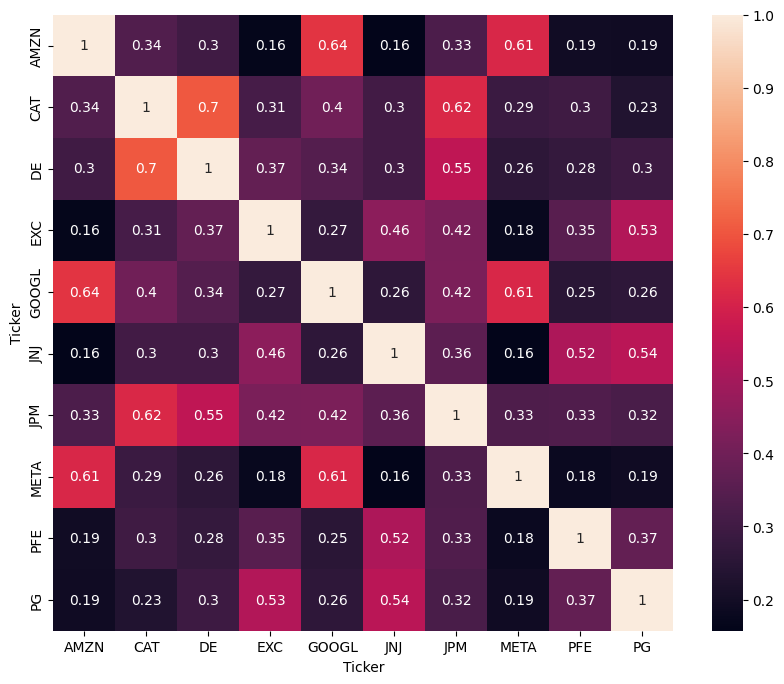

In [9]:
plt.figure(figsize = (10, 8))
sns.heatmap(daily_returns_df.drop(columns = ['Date']).corr(), annot = True);

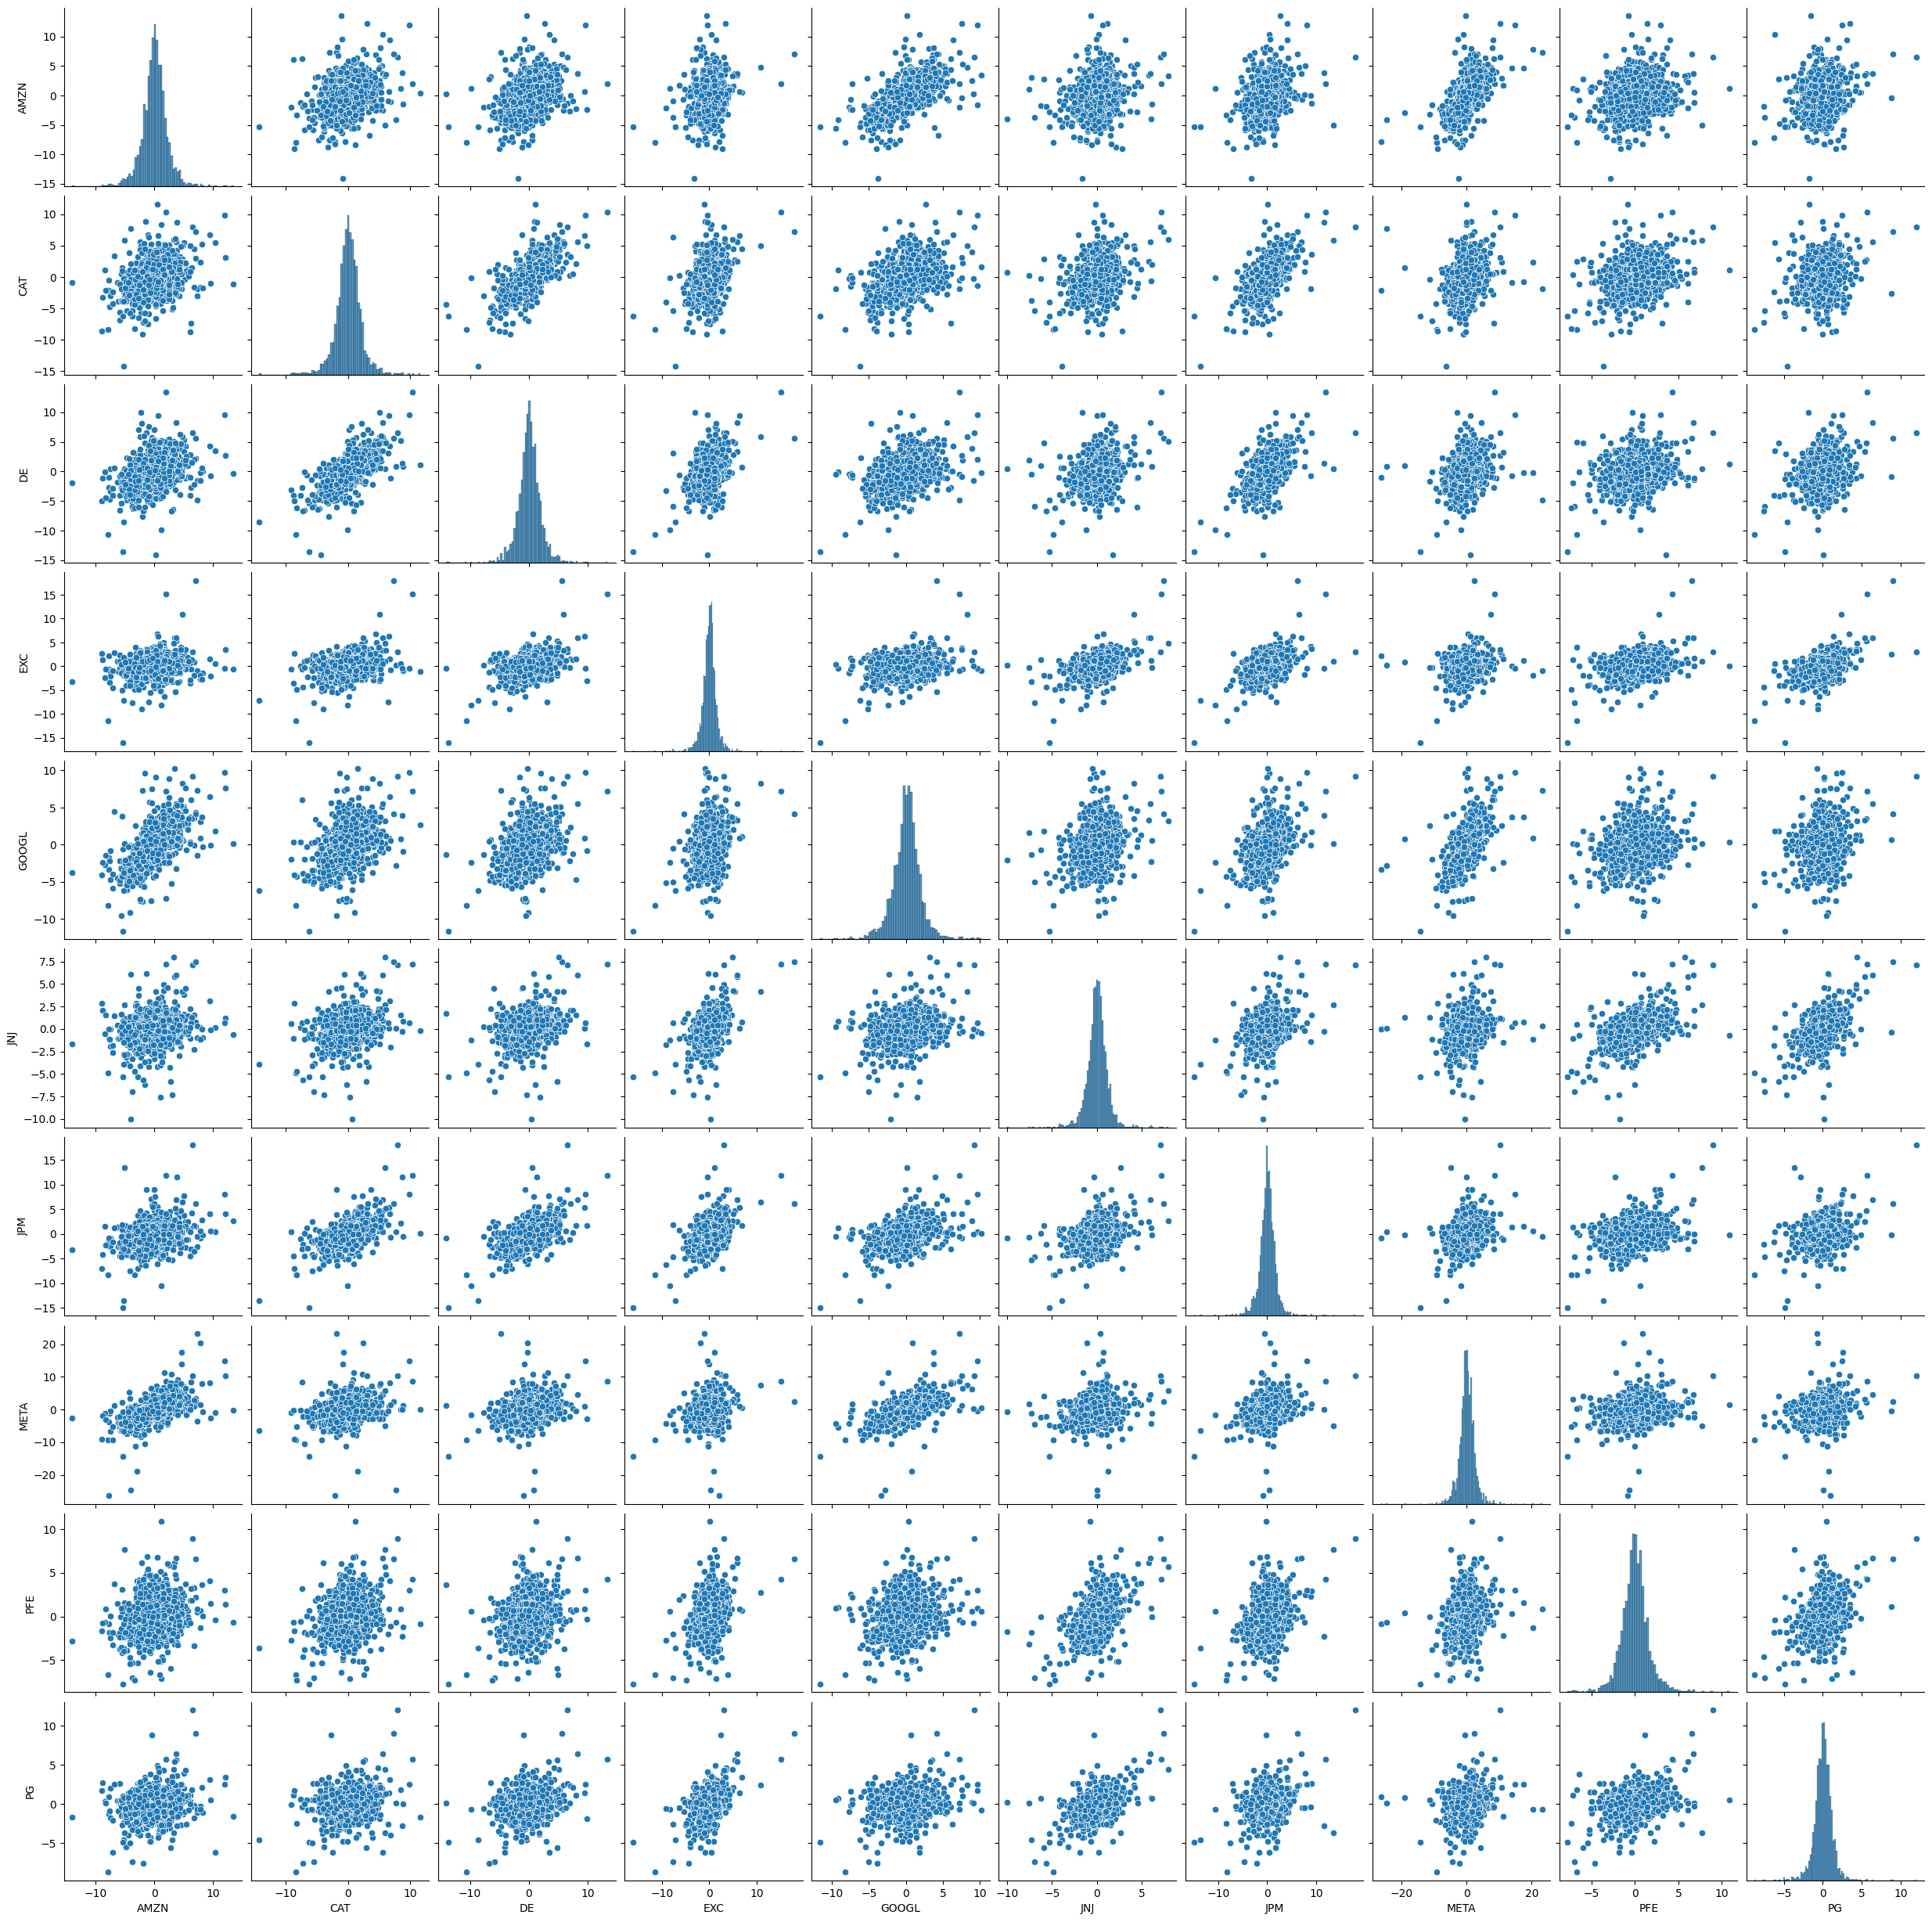

In [10]:
sns.pairplot(daily_returns_df);

In [11]:
# scaling stock prices based on their initial starting price
def price_scaling(raw_prices_df):
    scaled_prices_df = raw_prices_df.copy()
    for i in raw_prices_df.columns[1:]:
          scaled_prices_df[i] = raw_prices_df[i]/raw_prices_df[i][0]
    return scaled_prices_df

In [12]:
price_scaling(cleaned_close_price_df)

Ticker       Date      AMZN       CAT        DE       EXC     GOOGL       JNJ  \
0      2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1      2018-01-03  1.012775  1.001528  1.004556  0.986613  1.017061  1.009553   
2      2018-01-04  1.017309  1.015283  1.010316  0.972721  1.021012  1.009481   
3      2018-01-05  1.033751  1.031329  1.014619  0.964638  1.034551  1.017813   
4      2018-01-08  1.048662  1.057247  1.019619  0.974994  1.038203  1.019105   
...           ...       ...       ...       ...       ...       ...       ...   
1985   2025-11-24  3.806192  4.244163  3.462117  2.163841  5.977903  1.838747   
1986   2025-11-25  3.863214  4.297329  3.539569  2.142778  6.069098  1.855990   
1987   2025-11-26  3.854635  4.351329  3.338761  2.179755  6.003611  1.863982   
1988   2025-11-28  3.922927  4.366726  3.300533  2.205498  6.007926  1.858235   
1989   2025-12-01  3.948327  4.330871  3.357094  2.147459  5.931931  1.854867   

Ticker       JPM      META       PFE        PG  
0       1.000000  1.000000  1.000000  1.000000  
1       1.001019  1.017914  1.007409  0.998787  
2       1.015359  1.016040  1.009605  1.005847  
3       1.008841  1.029931  1.011526  1.006509  
4       1.010331  1.037813  1.000274  1.011804  
...          ...       ...       ...       ...  
1985    3.435937  3.400007  1.040876  2.004035  
1986    3.493587  3.528509  1.061511  2.024624  
1987    3.547086  3.514034  1.061099  2.021351  
1988    3.609809  3.593564  1.062337  2.020124  
1989    3.570031  3.557737  1.044384  2.024078  

[1990 rows x 11 columns]

In [13]:
scaled_prices_df=price_scaling(cleaned_close_price_df)
plot_financial_data(scaled_prices_df,"scaled_prices")

In [14]:
# function to generate random portfolio weights
import random
def generate_portfolio_weights(n):
    weights = []
    for i in range(n):
        weights.append(random.random())
    weights = weights/np.sum(weights)
    return weights

In [16]:
weights=generate_portfolio_weights(10)
print(np.sum(weights))

1.0


# **Asset Allocation & Portfolio Daily Return and value**

In [17]:
cleaned_close_price_df

Ticker       Date        AMZN         CAT          DE        EXC       GOOGL  \
0      2018-01-02   59.450500  131.851654  140.731827  21.364788   53.292931   
1      2018-01-03   60.209999  132.053146  141.373047  21.078777   54.202164   
2      2018-01-04   60.479500  133.866714  142.183578  20.781971   54.412708   
3      2018-01-05   61.457001  135.982498  142.789230  20.609278   55.134235   
4      2018-01-08   62.343498  139.399704  143.492798  20.830538   55.328892   
...           ...         ...         ...         ...        ...         ...   
1985   2025-11-24  226.279999  559.599976  487.230011  46.230000  318.579987   
1986   2025-11-25  229.669998  566.609985  498.130005  45.779999  323.440002   
1987   2025-11-26  229.160004  573.729980  469.869995  46.570000  319.950012   
1988   2025-11-28  233.220001  575.760010  464.489990  47.119999  320.179993   
1989   2025-12-01  234.729996  571.032471  472.450012  45.880001  316.130005   

Ticker         JNJ         JPM        META        PFE          PG  
0       111.352997   86.730339  180.308456  24.229601   73.342026  
1       112.416733   86.818733  183.538559  24.409128   73.253036  
2       112.408722   88.062462  183.200607  24.462317   73.770851  
3       113.336494   87.497139  185.705185  24.508869   73.819382  
4       113.480423   87.626343  187.126404  24.236248   74.207748  
...            ...         ...         ...        ...         ...  
1985    204.750000  298.000000  613.049988  25.219999  146.979996  
1986    206.669998  303.000000  636.219971  25.719999  148.490005  
1987    207.559998  307.640015  633.609985  25.709999  148.250000  
1988    206.919998  313.079987  647.950012  25.740000  148.160004  
1989    206.544998  309.630005  641.489990  25.305000  148.449997  

[1990 rows x 11 columns]

In [18]:
portfolio_df = cleaned_close_price_df.copy()
scaled_df = price_scaling(portfolio_df)
scaled_df

Ticker       Date      AMZN       CAT        DE       EXC     GOOGL       JNJ  \
0      2018-01-02  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1      2018-01-03  1.012775  1.001528  1.004556  0.986613  1.017061  1.009553   
2      2018-01-04  1.017309  1.015283  1.010316  0.972721  1.021012  1.009481   
3      2018-01-05  1.033751  1.031329  1.014619  0.964638  1.034551  1.017813   
4      2018-01-08  1.048662  1.057247  1.019619  0.974994  1.038203  1.019105   
...           ...       ...       ...       ...       ...       ...       ...   
1985   2025-11-24  3.806192  4.244163  3.462117  2.163841  5.977903  1.838747   
1986   2025-11-25  3.863214  4.297329  3.539569  2.142778  6.069098  1.855990   
1987   2025-11-26  3.854635  4.351329  3.338761  2.179755  6.003611  1.863982   
1988   2025-11-28  3.922927  4.366726  3.300533  2.205498  6.007926  1.858235   
1989   2025-12-01  3.948327  4.330871  3.357094  2.147459  5.931931  1.854867   

Ticker       JPM      META       PFE        PG  
0       1.000000  1.000000  1.000000  1.000000  
1       1.001019  1.017914  1.007409  0.998787  
2       1.015359  1.016040  1.009605  1.005847  
3       1.008841  1.029931  1.011526  1.006509  
4       1.010331  1.037813  1.000274  1.011804  
...          ...       ...       ...       ...  
1985    3.435937  3.400007  1.040876  2.004035  
1986    3.493587  3.528509  1.061511  2.024624  
1987    3.547086  3.514034  1.061099  2.021351  
1988    3.609809  3.593564  1.062337  2.020124  
1989    3.570031  3.557737  1.044384  2.024078  

[1990 rows x 11 columns]

In [19]:
initial_investment = 1000000
for i, stock in enumerate(scaled_df.columns[1:]):
    portfolio_df[stock] = weights[i] * scaled_df[stock]  * initial_investment
portfolio_df.round(1)

Ticker       Date      AMZN       CAT       DE       EXC     GOOGL       JNJ  \
0      2018-01-02   41639.5   61276.1  24883.6  168623.0   75227.2  154415.2   
1      2018-01-03   42171.5   61369.7  24997.0  166365.6   76510.6  155890.3   
2      2018-01-04   42360.2   62212.5  25140.3  164023.1   76807.8  155879.2   
3      2018-01-05   43044.9   63195.8  25247.4  162660.1   77826.3  157165.7   
4      2018-01-08   43665.8   64783.9  25371.8  164406.4   78101.1  157365.3   
...           ...       ...       ...      ...       ...       ...       ...   
1985   2025-11-24  158488.0  260065.6  86150.0  364873.3  449700.6  283930.4   
1986   2025-11-25  160862.4  263323.4  88077.3  361321.7  456560.9  286592.9   
1987   2025-11-26  160505.2  266632.3  83080.5  367556.8  451634.5  287827.1   
1988   2025-11-28  163348.8  267575.7  82129.2  371897.7  451959.2  286939.6   
1989   2025-12-01  164406.4  265378.7  83536.7  362110.9  446242.3  286419.6   

Ticker       JPM      META       PFE        PG  
0       140788.0   88238.0  166225.0   78684.5  
1       140931.5   89818.7  167456.6   78589.0  
2       142950.4   89653.3  167821.5   79144.5  
3       142032.8   90879.0  168140.9   79196.6  
4       142242.5   91574.5  166270.6   79613.3  
...          ...       ...       ...       ...  
1985    483738.8  300009.7  173019.5  157686.5  
1986    491855.2  311348.5  176449.7  159306.5  
1987    499387.3  310071.2  176381.1  159049.0  
1988    508217.9  317088.8  176586.9  158952.4  
1989    502617.6  313927.5  173602.7  159263.6  

[1990 rows x 11 columns]

In [20]:
# function to calculate Daily value (position) of each individual stock, value of the portfolio, Percentage daily return
def asset_allocation(df, weights, initial_investment):
    portfolio_df = df.copy()
    scaled_df = price_scaling(df)
    for i, stock in enumerate(scaled_df.columns[1:]):
        portfolio_df[stock] = scaled_df[stock] * weights[i] * initial_investment
    portfolio_df['Portfolio Value [$]'] = portfolio_df[portfolio_df != 'Date'].sum(axis = 1, numeric_only = True)
    portfolio_df['Portfolio Daily Return [%]'] = portfolio_df['Portfolio Value [$]'].pct_change(1) * 100
    portfolio_df.replace(np.nan, 0, inplace = True)

    return portfolio_df

In [21]:
n = len(cleaned_close_price_df.columns)-1   #-1 for Date column
print('Number of stocks under consideration = {}'.format(n))
weights = generate_portfolio_weights(n).round(6)
print('Portfolio weights = {}'.format(weights))

portfolio_df = asset_allocation(cleaned_close_price_df, weights, 1000000)
portfolio_df.round(2)

Number of stocks under consideration = 10
Portfolio weights = [0.123659 0.06387  0.127245 0.090713 0.024684 0.091443 0.088063 0.030001
 0.18103  0.179292]


Ticker       Date       AMZN        CAT         DE        EXC      GOOGL  \
0      2018-01-02  123659.00   63870.00  127245.00   90713.00   24684.00   
1      2018-01-03  125238.78   63967.60  127824.77   89498.62   25105.13   
2      2018-01-04  125799.35   64846.11  128557.63   88238.41   25202.65   
3      2018-01-05  127832.59   65871.01  129105.24   87505.17   25536.85   
4      2018-01-08  129676.53   67526.34  129741.38   88444.62   25627.01   
...           ...        ...        ...        ...        ...        ...   
1985   2025-11-24  470669.85  271074.72  440537.04  196288.49  147558.57   
1986   2025-11-25  477721.16  274470.43  450392.45  194377.82  149809.61   
1987   2025-11-26  476660.36  277919.41  424840.70  197732.10  148193.13   
1988   2025-11-28  485105.29  278902.77  419976.28  200067.35  148299.65   
1989   2025-12-01  488246.13  276612.71  427173.46  194802.43  146423.79   

Ticker        JNJ        JPM       META        PFE         PG  \
0        91443.00   88063.00   30001.00  181030.00  179292.00   
1        92316.54   88152.75   30538.45  182371.33  179074.46   
2        92309.96   89415.59   30482.22  182768.72  180340.31   
3        93071.85   88841.58   30898.95  183116.54  180458.94   
4        93190.04   88972.77   31135.42  181079.66  181408.35   
...           ...        ...        ...        ...        ...   
1985    168140.55  302578.94  102003.61  188429.70  359307.47   
1986    169717.25  307655.77  105858.79  192165.42  362998.84   
1987    170448.12  312367.08  105424.52  192090.71  362412.12   
1988    169922.55  317890.64  107810.52  192314.85  362192.11   
1989    169614.60  314387.65  106735.65  189064.78  362901.03   

Ticker  Portfolio Value [$]  Portfolio Daily Return [%]  
0                1000000.00                        0.00  
1                1004088.44                        0.41  
2                1007960.95                        0.39  
3                1012238.71                        0.42  
4                1016802.11                        0.45  
...                     ...                         ...  
1985             2646588.94                        0.89  
1986             2685167.54                        1.46  
1987             2668088.24                       -0.64  
1988             2682482.01                        0.54  
1989             2675962.24                       -0.24  

[1990 rows x 13 columns]

In [22]:
plot_financial_data(portfolio_df[['Date', 'Portfolio Daily Return [%]']], 'Portfolio Percentage Daily Return [%]')
plot_financial_data(portfolio_df.drop(['Portfolio Value [$]', 'Portfolio Daily Return [%]'], axis = 1), 'Portfolio positions [$]')
plot_financial_data(portfolio_df[['Date', 'Portfolio Value [$]']], 'Total Portfolio Value [$]')

# **Simulation Engine**

In [23]:
portfolio_df

Ticker       Date           AMZN            CAT             DE            EXC  \
0      2018-01-02  123659.000000   63870.000000  127245.000000   90713.000000   
1      2018-01-03  125238.782107   63967.604493  127824.769712   89498.623691   
2      2018-01-04  125799.352511   64846.111451  128557.625228   88238.410249   
3      2018-01-05  127832.586625   65871.014061  129105.235332   87505.169976   
4      2018-01-08  129676.530631   67526.335996  129741.377484   88444.620662   
...           ...            ...            ...            ...            ...   
1985   2025-11-24  470669.853731  271074.721796  440537.042441  196288.488217   
1986   2025-11-25  477721.164167  274470.426817  450392.451520  194377.824788   
1987   2025-11-26  476660.358788  277919.409626  424840.698055  197732.098786   
1988   2025-11-28  485105.287493  278902.772119  419976.277995  200067.346890   
1989   2025-12-01  488246.125824  276612.714234  427173.463017  194802.425659   

Ticker          GOOGL            JNJ            JPM           META  \
0        24684.000000   91443.000000   88063.000000   30001.000000   
1        25105.134838   92316.539198   88152.752392   30538.447373   
2        25202.654011   92309.960682   89415.591627   30482.216579   
3        25536.847960   93071.846803   88841.582243   30898.945972   
4        25627.008097   93190.040805   88972.771330   31135.418450   
...               ...            ...            ...            ...   
1985    147558.565453  168140.551073  302578.939358  102003.605648   
1986    149809.607577  169717.252173  307655.767200  105858.791761   
1987    148193.128281  170448.119024  312367.078310  105424.523885   
1988    148299.649687  169922.551991  317890.638494  107810.519274   
1989    146423.793029  169614.602264  314387.645875  106735.654994   

Ticker            PFE             PG  Portfolio Value [$]  \
0       181030.000000  179292.000000         1.000000e+06   
1       182371.327252  179074.456759         1.004088e+06   
2       182768.720602  180340.307010         1.007961e+06   
3       183116.535976  180458.944918         1.012239e+06   
4       181079.663481  181408.346595         1.016802e+06   
...               ...            ...                  ...   
1985    188429.701890  359307.465564         2.646589e+06   
1986    192165.421696  362998.837163         2.685168e+06   
1987    192090.705590  362412.119460         2.668088e+06   
1988    192314.853908  362192.114309         2.682482e+06   
1989    189064.781667  362901.032228         2.675962e+06   

Ticker  Portfolio Daily Return [%]  
0                         0.000000  
1                         0.408844  
2                         0.385674  
3                         0.424397  
4                         0.450823  
...                            ...  
1985                      0.893468  
1986                      1.457673  
1987                     -0.636061  
1988                      0.539479  
1989                     -0.243050  

[1990 rows x 13 columns]

In [25]:
#fetching risk free rates and taking aveerage over time period of stock data
try:
    tnx_data = yf.download("^TNX", start=start, end=end, progress=False)
    # converted to float to avoid "Series" error
    # using .iloc[0] just in case it returns a single-item Series, or float() directly
    raw_mean = tnx_data["Close"].mean()

    # to check if it's a Series/DataFrame and extract the value
    if isinstance(raw_mean, (pd.Series, pd.DataFrame)):
        average_rf = float(raw_mean.iloc[0]) / 100
    else:
        average_rf = float(raw_mean) / 100
    print(f"Historical Average Risk-Free Rate (2018-Now): {average_rf:.2%}")

except Exception as e:
    print(f"Could not fetch data. Defaulting to 3%. Error: {e}")
    average_rf = 0.03

# function to calculate Expected portfolio return, Expected volatility, Sharpe ratio, Return on investment, Final portfolio value in dollars
def simulation_engine(weights, initial_investment):
    portfolio_df = asset_allocation(cleaned_close_price_df, weights, initial_investment)
    # return on investment ((final-initial)*100/initial)
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] -
                             portfolio_df['Portfolio Value [$]'][0])/
                             portfolio_df['Portfolio Value [$]'][0]) * 100

    # Daily change of every stock in the portfolio
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)

    # Portfolio Expected Return (mean) formula- multiplies weights array by daily return means of stocks array and takes sum of resulting array (252 used to annualize expected daily returns)
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean()) * 252

    # expected volatility (risk-std. deviation)
    covariance = portfolio_daily_return_df.cov() * 252
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Sharpe ratio
    rf=average_rf
    sharpe_ratio = (expected_portfolio_return - rf)/expected_volatility
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0]

Historical Average Risk-Free Rate (2018-Now): 2.83%


In [26]:
initial_investment = 1000000
portfolio_metrics = simulation_engine(weights, initial_investment)

In [27]:
weights

array([0.123659, 0.06387 , 0.127245, 0.090713, 0.024684, 0.091443,
       0.088063, 0.030001, 0.18103 , 0.179292])

In [28]:
print('Expected Portfolio Annual Return = {:.2f}%'.format(portfolio_metrics[0] * 100))
print('Portfolio Standard Deviation (Volatility) = {:.2f}%'.format(portfolio_metrics[1] * 100))
print('Sharpe Ratio = {:.2f}'.format(portfolio_metrics[2]))
print('Portfolio Final Value = ${:.2f}'.format(portfolio_metrics[3]))
print('Return on Investment = {:.2f}%'.format(portfolio_metrics[4]))

Expected Portfolio Annual Return = 14.91%
Portfolio Standard Deviation (Volatility) = 17.57%
Sharpe Ratio = 0.69
Portfolio Final Value = $2675962.24
Return on Investment = 167.60%


In [30]:
#for equal weights
weights=np.array([0.1]*10)
new_portfolio_metrics=simulation_engine(weights,initial_investment)
print("Sharp Ratio is {}".format(new_portfolio_metrics[2]))
print("Portfolio Final Value is {}".format(new_portfolio_metrics[3]))

Sharp Ratio is 0.7894558665293329
Portfolio Final Value is 3176677.832683438


## **Monte Carlo Simulation**

In [31]:
sim_runs = 10000
initial_investment = 1000000

# Placeholder to store all weights
weights_runs = np.zeros((sim_runs, n))
# Placeholder to store all Sharpe ratios
sharpe_ratio_runs = np.zeros(sim_runs)
# Placeholder to store all expected returns
expected_portfolio_returns_runs = np.zeros(sim_runs)
# Placeholder to store all volatility values
volatility_runs = np.zeros(sim_runs)
# Placeholder to store all returns on investment
return_on_investment_runs = np.zeros(sim_runs)
# Placeholder to store all final portfolio values
final_value_runs = np.zeros(sim_runs)

for i in range(sim_runs):
    weights = generate_portfolio_weights(n)
    weights_runs[i,:] = weights

    expected_portfolio_returns_runs[i], volatility_runs[i], sharpe_ratio_runs[i], final_value_runs[i], return_on_investment_runs[i] = simulation_engine(weights, initial_investment)
    print("Simulation Run = {}".format(i))
    print("Weights = {}, Final Value = ${:.2f}, Sharpe Ratio = {:.2f}".format(weights_runs[i].round(3), final_value_runs[i], sharpe_ratio_runs[i]))
    print('\n')


Streaming output truncated to the last 5000 lines.
Simulation Run = 8750
Weights = [0.082 0.047 0.118 0.155 0.156 0.059 0.047 0.131 0.062 0.144], Final Value = $3278971.31, Sharpe Ratio = 0.80


Simulation Run = 8751
Weights = [0.045 0.2   0.052 0.189 0.048 0.126 0.12  0.175 0.033 0.012], Final Value = $3251308.73, Sharpe Ratio = 0.79


Simulation Run = 8752
Weights = [0.014 0.057 0.084 0.16  0.077 0.127 0.101 0.146 0.183 0.05 ], Final Value = $2795593.55, Sharpe Ratio = 0.70


Simulation Run = 8753
Weights = [0.118 0.107 0.112 0.111 0.109 0.097 0.017 0.139 0.143 0.046], Final Value = $3171324.15, Sharpe Ratio = 0.76


Simulation Run = 8754
Weights = [0.079 0.182 0.056 0.087 0.118 0.095 0.046 0.102 0.224 0.011], Final Value = $3134664.40, Sharpe Ratio = 0.73


Simulation Run = 8755
Weights = [0.042 0.032 0.194 0.058 0.048 0.    0.205 0.08  0.093 0.248], Final Value = $2977815.95, Sharpe Ratio = 0.74


Simulation Run = 8756
Weights = [0.143 0.149 0.157 0.074 0.051 0.019 0.098 0.154 0.  

In [32]:
print(np.max(sharpe_ratio_runs))
print(np.max(return_on_investment_runs))
print(np.max(expected_portfolio_returns_runs))
print(np.max(final_value_runs))

0.8683197387411579
313.5967019889424
0.22817390292368567
4135967.019889424


###**Obtaining optimal portfolio outputs**

In [33]:
sharpe_ratio_runs

array([0.78082307, 0.79702226, 0.79667829, ..., 0.74941268, 0.79019198,
       0.73234802])

In [34]:
# index of the maximum Sharpe ratio (Best simulation run)
sharpe_ratio_runs.argmax()

np.int64(7377)

In [35]:
# maximum Sharpe ratio value
sharpe_ratio_runs.max()

np.float64(0.8683197387411579)

In [36]:
weights_runs

array([[0.14392315, 0.08706357, 0.10800791, ..., 0.08821255, 0.14687235,
        0.03486616],
       [0.00125505, 0.19485747, 0.13650087, ..., 0.02999037, 0.01023211,
        0.08315119],
       [0.15866052, 0.08182669, 0.1267495 , ..., 0.04694168, 0.0988107 ,
        0.02734332],
       ...,
       [0.19406758, 0.02164675, 0.02748367, ..., 0.13316711, 0.04143475,
        0.15646258],
       [0.13029454, 0.02177188, 0.13408116, ..., 0.08906968, 0.10935721,
        0.11298974],
       [0.05795762, 0.18537211, 0.06660277, ..., 0.14822078, 0.12567593,
        0.11488588]])

In [37]:
# portfolio weights that correspond to the maximum Sharpe ratio
weights_runs[sharpe_ratio_runs.argmax(), :]

array([0.01077724, 0.13771951, 0.081315  , 0.14249784, 0.33450599,
       0.0042639 , 0.03737714, 0.04198042, 0.01520363, 0.19435932])

In [38]:
#to return optimal_portfolio_df and optimal_portfolio_daily_return _df too
def new_simulation_engine(weights, initial_investment):
    portfolio_df = asset_allocation(cleaned_close_price_df, weights, initial_investment)
    # return on investment ((final-initial)*100/initial)
    return_on_investment = ((portfolio_df['Portfolio Value [$]'][-1:] -
                             portfolio_df['Portfolio Value [$]'][0])/
                             portfolio_df['Portfolio Value [$]'][0]) * 100

    # Daily change of every stock in the portfolio
    portfolio_daily_return_df = portfolio_df.drop(columns = ['Date', 'Portfolio Value [$]', 'Portfolio Daily Return [%]'])
    portfolio_daily_return_df = portfolio_daily_return_df.pct_change(1)

    # Portfolio Expected Return (mean) formula- multiplies weights array by daily return means of stocks array and takes sum of resulting array (252 used to annualize expected daily returns)
    expected_portfolio_return = np.sum(weights * portfolio_daily_return_df.mean()) * 252

    # expected volatility (risk-std. deviation)
    covariance = portfolio_daily_return_df.cov() * 252
    expected_volatility = np.sqrt(np.dot(weights.T, np.dot(covariance, weights)))

    # Sharpe ratio
    rf=average_rf
    sharpe_ratio = (expected_portfolio_return - rf)/expected_volatility
    return expected_portfolio_return, expected_volatility, sharpe_ratio, portfolio_df['Portfolio Value [$]'][-1:].values[0], return_on_investment.values[0], portfolio_df, portfolio_daily_return_df

In [39]:
# Sharpe ratio, volatility corresponding to the best weights allocation (maximum Sharpe ratio)
optimal_portfolio_return, optimal_volatility, optimal_sharpe_ratio, highest_final_value, optimal_return_on_investment, optimal_portfolio_df, optimal_portfolio_daily_return_df = new_simulation_engine(weights_runs[sharpe_ratio_runs.argmax(), :], initial_investment)

In [40]:
print('Best Portfolio Metrics Based on {} Monte Carlo Simulation Runs:'.format(sim_runs))
print('  - Portfolio Expected Annual Return = {:.02f}%'.format(optimal_portfolio_return * 100))
print('  - Portfolio Standard Deviation (Volatility) = {:.02f}%'.format(optimal_volatility * 100))
print('  - Sharpe Ratio = {:.02f}'.format(optimal_sharpe_ratio))
print('  - Final Value = ${:.02f}'.format(highest_final_value))
print('  - Return on Investment = {:.02f}%'.format(optimal_return_on_investment))

Best Portfolio Metrics Based on 10000 Monte Carlo Simulation Runs:
  - Portfolio Expected Annual Return = 20.18%
  - Portfolio Standard Deviation (Volatility) = 19.98%
  - Sharpe Ratio = 0.87
  - Final Value = $3902233.10
  - Return on Investment = 290.22%


In [41]:
#portfolio_df of optimal portfolio
optimal_portfolio_df

Ticker       Date          AMZN            CAT             DE            EXC  \
0      2018-01-02  10777.241928  137719.514538   81314.995558  142497.844548   
1      2018-01-03  10914.924538  137929.973962   81685.493193  140590.223739   
2      2018-01-04  10963.779881  139824.252211   82153.819202  138610.598997   
3      2018-01-05  11140.982155  142034.195688   82503.765473  137458.777776   
4      2018-01-08  11301.687244  145603.479128   82910.287507  138934.527645   
...           ...           ...            ...            ...            ...   
1985   2025-11-24  41020.248277  584504.134795  281522.005966  308342.646374   
1986   2025-11-25  41634.790514  591826.114551  287820.033751  305341.252745   
1987   2025-11-26  41542.338237  599262.974393  271491.370782  310610.363178   
1988   2025-11-28  42278.338364  601383.347105  268382.798378  314278.721862   
1989   2025-12-01  42552.071570  596445.415993  272982.107334  306008.243242   

Ticker         GOOGL          JNJ            JPM           META           PFE  \
0       3.345060e+05  4263.901257   37377.141163   41980.420804  15203.630495   
1       3.402130e+05  4304.633570   37415.235343   42732.471298  15316.280575   
2       3.415345e+05  4304.326820   37951.230260   42653.787507  15349.655273   
3       3.460634e+05  4339.852854   37707.599794   43236.917246  15378.866213   
4       3.472852e+05  4345.364130   37763.281215   43567.813353  15207.801435   
...              ...          ...            ...            ...           ...   
1985    1.999644e+06  7840.236071  128425.510479  142733.718496  15825.087344   
1986    2.030150e+06  7913.756163  130580.300923  148128.283188  16138.828180   
1987    2.008244e+06  7947.835799  132579.952769  147520.611836  16132.553220   
1988    2.009687e+06  7923.329101  134924.352672  150859.336895  16151.378101   
1989    1.984267e+06  7908.969694  133437.555157  149355.278537  15878.423908   

Ticker             PG  Portfolio Value [$]  Portfolio Daily Return [%]  
0       194359.319530         1.000000e+06                    0.000000  
1       194123.494416         1.005226e+06                    0.522574  
2       195495.724039         1.008842e+06                    0.359718  
3       195624.332025         1.015489e+06                    0.658870  
4       196653.519406         1.023573e+06                    0.796097  
...               ...                  ...                         ...  
1985    389502.903136         3.899361e+06                    3.357416  
1986    393504.489778         3.953037e+06                    1.376544  
1987    392868.465563         3.928200e+06                   -0.628306  
1988    392629.971646         3.938499e+06                    0.262172  
1989    393398.465524         3.902233e+06                   -0.920802  

[1990 rows x 13 columns]

In [42]:
#portfolio_daily_return_df of optimal portfolio
optimal_portfolio_daily_return_df

Ticker      AMZN       CAT        DE       EXC     GOOGL       JNJ       JPM  \
0            NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1       0.012775  0.001528  0.004556 -0.013387  0.017061  0.009553  0.001019   
2       0.004476  0.013734  0.005733 -0.014081  0.003884 -0.000071  0.014326   
3       0.016163  0.015805  0.004260 -0.008310  0.013260  0.008254 -0.006420   
4       0.014425  0.025130  0.004927  0.010736  0.003531  0.001270  0.001477   
...          ...       ...       ...       ...       ...       ...       ...   
1985    0.025330  0.016660 -0.000020  0.010492  0.063138  0.010544 -0.000067   
1986    0.014981  0.012527  0.022371 -0.009734  0.015255  0.009377  0.016779   
1987   -0.002221  0.012566 -0.056732  0.017256 -0.010790  0.004306  0.015314   
1988    0.017717  0.003538 -0.011450  0.011810  0.000719 -0.003083  0.017683   
1989    0.006475 -0.008211  0.017137 -0.026316 -0.012649 -0.001812 -0.011019   

Ticker      META       PFE        PG  
0            NaN       NaN       NaN  
1       0.017914  0.007409 -0.001213  
2      -0.001841  0.002179  0.007069  
3       0.013671  0.001903  0.000658  
4       0.007653 -0.011123  0.005261  
...          ...       ...       ...  
1985    0.031636  0.007188 -0.026107  
1986    0.037795  0.019826  0.010274  
1987   -0.004102 -0.000389 -0.001616  
1988    0.022632  0.001167 -0.000607  
1989   -0.009970 -0.016900  0.001957  

[1990 rows x 10 columns]

In [43]:
#plotting optimal portfolio daily return, individual stock positions, toal portfolio value
plot_financial_data(optimal_portfolio_df[['Date', 'Portfolio Daily Return [%]']], 'Portfolio Percentage Daily Return [%]')
plot_financial_data(optimal_portfolio_df.drop(['Portfolio Value [$]', 'Portfolio Daily Return [%]'], axis = 1), 'Portfolio positions [$]')
plot_financial_data(optimal_portfolio_df[['Date', 'Portfolio Value [$]']], 'Total Portfolio Value [$]')

In [44]:
# a DataFrame that contains volatility, return, and Sharpe ratio for all simualation runs
sim_out_df = pd.DataFrame({'Volatility': volatility_runs.tolist(), 'Portfolio_Return': expected_portfolio_returns_runs.tolist(), 'Sharpe_Ratio': sharpe_ratio_runs.tolist() })
sim_out_df

Volatility  Portfolio_Return  Sharpe_Ratio
0       0.203411          0.187141      0.780823
1       0.206222          0.192677      0.797022
2       0.195209          0.183832      0.796678
3       0.192540          0.181339      0.794772
4       0.205699          0.195666      0.813578
...          ...               ...           ...
9995    0.211231          0.201100      0.818000
9996    0.195715          0.179499      0.772481
9997    0.184613          0.166665      0.749413
9998    0.191137          0.179348      0.790192
9999    0.187608          0.165708      0.732348

[10000 rows x 3 columns]

## **Effecient Frontier: Monte Carlo Simulation**

In [45]:
# Plot of volatility vs. return for all simulation runs
import plotly.graph_objects as go
fig = px.scatter(
    sim_out_df,
    x='Volatility',
    y='Portfolio_Return',
    color='Sharpe_Ratio',
    title='Efficient Frontier: Volatility vs. Return',
    hover_data=['Sharpe_Ratio'],
    color_continuous_scale="Plasma"
)

fig.update_traces(
    marker=dict(
        size=7,
        opacity=0.7,
        line=dict(width=0.5, color='black')
    )
)

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    xaxis_title="Risk (Volatility)",
    yaxis_title="Return"
)

fig.show()


In [46]:
print(sim_out_df[['Volatility', 'Portfolio_Return', 'Sharpe_Ratio']].isnull().sum())

Volatility          0
Portfolio_Return    0
Sharpe_Ratio        0
dtype: int64


In [47]:
fig = px.scatter(
    sim_out_df,
    x='Volatility',
    y='Portfolio_Return',
    color='Sharpe_Ratio',
    title='Efficient Frontier: Monte Carlo Simulation',
    labels={'Portfolio_Return': 'Expected Return', 'Volatility': 'Risk (Volatility)'},
    color_continuous_scale='Plasma',
    hover_data=['Sharpe_Ratio']
)

#Adding the Highlighted "Optimal Point"
fig.add_trace(
    go.Scatter(
        x=[optimal_volatility],
        y=[optimal_portfolio_return],
        mode='markers+text',
        name='Max Sharpe Ratio',
        text=[f'★ Optimal SR: {optimal_sharpe_ratio:.2f}'],
        textposition="top center",
        marker=dict(
            size=18,        # Large size for visibility
            color='red',    # Distinct color
            symbol='star',  # Star shape
            line=dict(width=2, color='black') # Outline to make it pop
        )
    )
)

fig.update_traces(
    marker=dict(opacity=0.6, line=dict(width=0.1, color='gray')),
    selector=dict(mode='markers') # Apply opacity only to the background dots
)

fig.data[-1].marker.opacity = 1.0

fig.update_layout(
    plot_bgcolor='white',
    paper_bgcolor='white',
    font=dict(color='black'),
    coloraxis_colorbar=dict(title="Sharpe Ratio"),
    legend=dict(x=0.02, y=0.95, bgcolor='rgba(255,255,255,0.8)'),
    xaxis=dict(showgrid=True, gridcolor='#f0f0f0'),
    yaxis=dict(showgrid=True, gridcolor='#f0f0f0')
)

fig.show()

## **Hierarchical Risk Parity (HRP)**

In [52]:
# ADVANCED OPTIMIZATION (HRP)
from pypfopt import expected_returns, risk_models
from pypfopt import HRPOpt

print("\nRUNNING AI-BASED OPTIMIZATION (HRP)")
prices_for_optim = cleaned_close_price_df.drop(columns=['Date', 'SPY'], errors='ignore')
prices_for_optim = prices_for_optim.set_index(pd.to_datetime(cleaned_close_price_df['Date']))
returns = prices_for_optim.pct_change().dropna()

# Runing Hierarchical Risk Parity (HRP) (uses graph theory (linkage) to cluster stocks by correlation)
hrp = HRPOpt(returns=returns)
hrp_weights = hrp.optimize()

print("HRP Optimization Complete")
hrp.portfolio_performance(verbose=True)

print("\nOPTIMIZED WEIGHTS (HRP):")
# Clean weights (removes near-zero values)
clean_weights = hrp.clean_weights()
print(clean_weights)


RUNNING AI-BASED OPTIMIZATION (HRP)
HRP Optimization Complete
Expected annual return: 14.6%
Annual volatility: 17.1%
Sharpe Ratio: 0.86

OPTIMIZED WEIGHTS (HRP):
OrderedDict({'AMZN': 0.04517, 'CAT': 0.07987, 'DE': 0.08113, 'EXC': 0.13894, 'GOOGL': 0.05585, 'JNJ': 0.19766, 'JPM': 0.06903, 'META': 0.051, 'PFE': 0.13522, 'PG': 0.14612})


In [53]:
# DISCRETE ALLOCATION
from pypfopt.discrete_allocation import DiscreteAllocation, get_latest_prices

portfolio_value = initial_investment
print(f"\nEXECUTING PORTFOLIO (${portfolio_value})")

# Calculating exact shares to buy
latest_prices = get_latest_prices(prices_for_optim)
da = DiscreteAllocation(clean_weights, latest_prices, total_portfolio_value=portfolio_value)
allocation, leftover = da.greedy_portfolio()

print("SHARES TO BUY:")
for ticker, shares in allocation.items():
    print(f"{ticker}: {shares} shares")

print(f"\nCASH LEFTOVER: ${leftover:.2f}")


EXECUTING PORTFOLIO ($1000000)
SHARES TO BUY:
JNJ: 956 shares
PG: 984 shares
EXC: 3028 shares
PFE: 5344 shares
DE: 172 shares
CAT: 140 shares
JPM: 223 shares
GOOGL: 176 shares
META: 80 shares
AMZN: 192 shares

CASH LEFTOVER: $33.94


## **Backtesting Visualization**

In [54]:
# BACKTESTING VISUALIZATION
import plotly.graph_objects as go

print("\nBACKTEST: HRP PORTFOLIO vs S&P 500")

# to Calculate Portfolio Cumulative Returns
# Weighted sum of individual stock returns
portfolio_returns = (returns * pd.Series(clean_weights)).sum(axis=1)
cumulative_portfolio_return = (1 + portfolio_returns).cumprod()

# to Calculate SPY (Benchmark) Cumulative Returns
spy_prices = all_data[['Date', 'SPY']].set_index('Date')
spy_returns = spy_prices['SPY'].pct_change().dropna()
cumulative_spy_return = (1 + spy_returns).cumprod()

# Aligning dates (HRP starts slightly later due to dropna)
common_index = cumulative_portfolio_return.index.intersection(cumulative_spy_return.index)
cumulative_portfolio_return = cumulative_portfolio_return.loc[common_index]
cumulative_spy_return = cumulative_spy_return.loc[common_index]

# Plotting
fig = go.Figure()

# Portfolio Line
fig.add_trace(go.Scatter(
    x=cumulative_portfolio_return.index,
    y=cumulative_portfolio_return,
    mode='lines',
    name='AI Optimized Portfolio (HRP)',
    line=dict(color='green', width=2)
))

# Benchmark Line
fig.add_trace(go.Scatter(
    x=cumulative_spy_return.index,
    y=cumulative_spy_return,
    mode='lines',
    name='S&P 500 Benchmark (SPY)',
    line=dict(color='gray', width=2, dash='dash')
))

fig.update_layout(
    title='Strategy Backtest: HRP vs. S&P 500',
    xaxis_title='Date',
    yaxis_title='Cumulative Return ($1 = Initial Investment)',
    template='plotly_white'
)

fig.show()


BACKTEST: HRP PORTFOLIO vs S&P 500
